In [34]:
import pandas as pd
import numpy as np

In [91]:
data = pd.read_csv('/Users/aslidonmez/Desktop/County.csv', encoding='iso-8859-1')
data

,GEONAME,LNTITLE,GEOID,LNNUMBER,TOT_EST,TOT_MOE,ADU_EST,ADU_MOE,CIT_EST,CIT_MOE,CVAP_EST,CVAP_MOE
0,"Autauga County, Alabama",Total,05000US01001,1,55035,0,41525,39,54485,228,41015,202
1,"Autauga County, Alabama",Not Hispanic or Latino,05000US01001,2,53570,0,40575,38,53215,179,40260,144
2,"Autauga County, Alabama",American Indian or Alaska Native Alone,05000US01001,3,170,61,85,45,170,61,85,45
3,"Autauga County, Alabama",Asian Alone,05000US01001,4,515,162,415,98,315,154,220,120
4,"Autauga County, Alabama",Black or African American Alone,05000US01001,5,10420,162,7620,71,10420,162,7620,71
...,...,...,...,...,...,...,...,...,...,...,...,...
41855,"Yauco Municipio, Puerto Rico",Asian and White,05000US72153,9,0,29,0,29,0,29,0,29
41856,"Yauco Municipio, Puerto Rico",Black or African American and White,05000US72153,10,0,29,0,29,0,29,0,29
41857,"Yauco Municipio, Puerto Rico",American Indian or Alaska Native and Black or ...,05000US72153,11,0,29,0,29,0,29,0,29
41858,"Yauco Municipio, Puerto Rico",Remainder of Two or More Race Responses,05000US72153,12,0,29,0,29,0,29,0,29


In [36]:
import geopandas


In [52]:
import os
import geopandas as gpd


os.environ['SHAPE_RESTORE_SHX'] = 'YES'

shapefile = gpd.read_file('/Users/aslidonmez/Desktop/tl_2023_us_county')

print(shapefile)


     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None        A   
1     Wahkiakum C

In [55]:
# 1. Load and Visualize the Dataset:
merged = shapefile.merge(data, how="left",left_on="GEOIDFQ",right_on="GEOID")
print(merged)

     STATEFP COUNTYFP  COUNTYNS GEOID_x         GEOIDFQ       NAME  \
0         31      039  00835841   31039  0500000US31039     Cuming   
1         53      069  01513275   53069  0500000US53069  Wahkiakum   
2         35      011  00933054   35011  0500000US35011    De Baca   
3         31      109  00835876   31109  0500000US31109  Lancaster   
4         31      129  00835886   31129  0500000US31129   Nuckolls   
...      ...      ...       ...     ...             ...        ...   
3230      13      123  00351260   13123  0500000US13123     Gilmer   
3231      27      135  00659513   27135  0500000US27135     Roseau   
3232      28      089  00695768   28089  0500000US28089    Madison   
3233      48      227  01383899   48227  0500000US48227     Howard   
3234      54      099  01550056   54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC  ... GEOID_y LNNUMBER TOT_EST  \
0        Cuming County   06      H1  G4020  ...     NaN      NaN     NaN   
1     W

<Axes: >

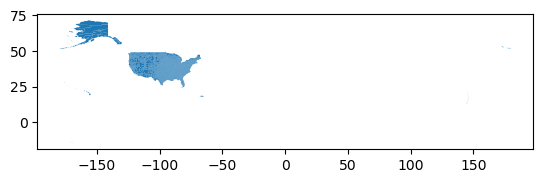

In [58]:
merged.plot()

In [62]:
# 2. Spatial Weight Matrix:
import pysal as ps
import libpysal
from libpysal.weights import Queen, Rook, KNN

In [61]:
pip install pysal

  Obtaining dependency information for pysal from https://files.pythonhosted.org/packages/5d/7d/2eb9e1250446a62649bd0b8efe44a7da9587b09e609681b29d0ef637fc8c/pysal-24.1-py3-none-any.whl.metadata
  Obtaining dependency information for libpysal>=4.6.2 from https://files.pythonhosted.org/packages/6e/bd/0aa03cd034bbe245190d89342b932aa162facd4d5eed4ea3ceab67fad3a4/libpysal-4.10-py3-none-any.whl.metadata
  Obtaining dependency information for access>=1.1.8 from https://files.pythonhosted.org/packages/5d/e0/be59a75ad3d0b0fea7f8c6c55439772c4bb791406f3653aa25880ec68d7f/access-1.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for esda>=2.4.1 from https://files.pythonhosted.org/packages/ea/e1/6000a61d9a964dbb592db8271232693ef2e341d088c7bdf9393a9a34b658/esda-2.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for giddy>=2.3.3 from https://files.pythonhosted.org/packages/a2/19/9125c0ec03be4e4345b95c8a8490d4552fb224cb86ed27e0ef2d37d09e06/giddy-2.3.5-py3-none-any.whl.me

In [67]:
wq = libpysal.weights.Queen.from_dataframe(merged)
import matplotlib.pyplot as plt

/var/folders/r_/k70h_v6j2vn5_5x0t4jwzplc0000gn/T/ipykernel_3845/1594786624.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(merged)
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 10 islands with ids: 364, 798, 889, 962, 1244, 1928, 2083, 2736, 3104, 3211.
  W.__init__(self, neighbors, ids=ids, **kw)


/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


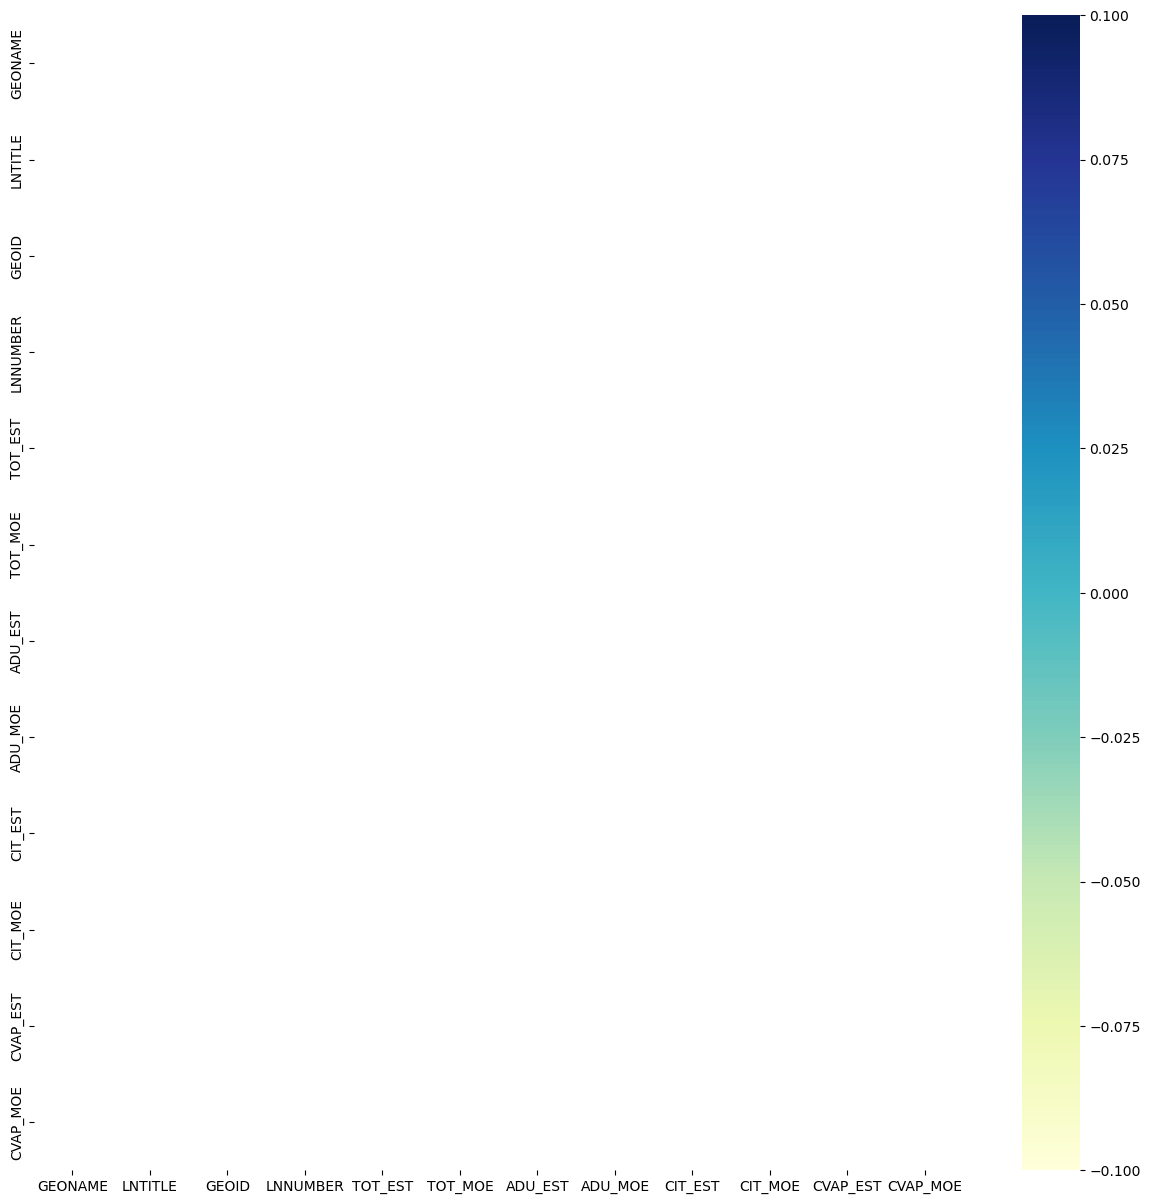

In [68]:
merged['TOT_EST'] = libpysal.weights.lag_spatial(wq, merged['TOT_EST'])
merged['ADU_EST'] = libpysal.weights.lag_spatial(wq, merged['ADU_EST'])
merged['CIT_EST'] = libpysal.weights.lag_spatial(wq, merged['CIT_EST'])
merged['CVAP_EST'] = libpysal.weights.lag_spatial(wq, merged['CVAP_EST'])

import seaborn as sns

fig = plt.subplots(figsize=(15, 15))
sns.heatmap(merged_data[['GEONAME', 'LNTITLE', 'GEOID', 'LNNUMBER', 'TOT_EST', 'TOT_MOE',
       'ADU_EST', 'ADU_MOE', 'CIT_EST', 'CIT_MOE', 'CVAP_EST', 'CVAP_MOE']].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [81]:
#3. Spatial Autocorrelation:
import geopandas as gpd
import libpysal
from libpysal import weights
from esda.moran import Moran


total = data['TOT_EST']


geo = shapefile['geometry']

data = data[~data.index.isin(w.islands)]
total = total.dropna()


w = weights.Queen.from_dataframe(shapefile, use_index=False)


moran = Moran(total, w)


print("Moran's I:", moran.I)

print("Moran's I p-value:", moran.p_sim)


('WARNING: ', 364, ' is an island (no neighbors)')
('WARNING: ', 798, ' is an island (no neighbors)')
('WARNING: ', 889, ' is an island (no neighbors)')
('WARNING: ', 962, ' is an island (no neighbors)')
('WARNING: ', 1244, ' is an island (no neighbors)')
('WARNING: ', 1928, ' is an island (no neighbors)')
('WARNING: ', 2083, ' is an island (no neighbors)')
('WARNING: ', 2736, ' is an island (no neighbors)')
('WARNING: ', 3104, ' is an island (no neighbors)')
('WARNING: ', 3211, ' is an island (no neighbors)')


ValueError: dimension mismatch

In [93]:
#4. Spatial Regression:
import geopandas as gpd
from libpysal import weights
from spreg import OLS

dependent_variable = merged['ADU_EST']

independent_variables = merged[['TOT_EST', 'TOT_MOE','ADU_MOE', 'CIT_EST', 'CIT_MOE', 'CVAP_EST', 'CVAP_MOE']]


w = weights.Queen.from_dataframe(shapefile, use_index=False)



model = OLS(dependent_variable, independent_variables, w)


print(model.summary)



/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 10 islands with ids: 364, 798, 889, 962, 1244, 1928, 2083, 2736, 3104, 3211.
  W.__init__(self, neighbors, ids=ids, **kw)


Exception: all input data must be either numpy arrays or sparse csr matrices

<Axes: >

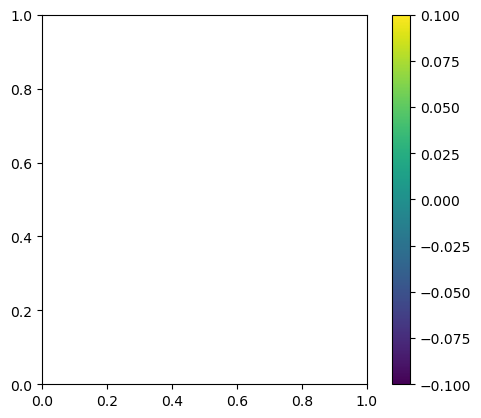

In [92]:
#5. Visualization:
fig, ax = plt.subplots(1, 1)
merged.plot(column='ADU_MOE', ax=ax, legend=True)